# K-Means Clustering

K-Means is a Un-Supervised learning technique.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


In Centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset.

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data.
df=pd.read_csv('E:/data sets/clustering data/Mall_customer.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.rename(columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

In [9]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualization

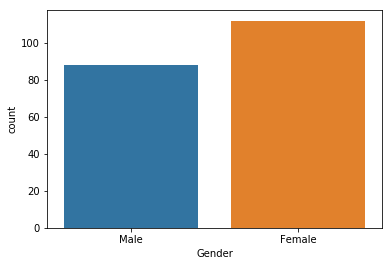

In [10]:
#Gender
sns.countplot(x=df['Gender'])

more number of Females are participating than male 

Text(0.5, 1.0, 'spread of Age')

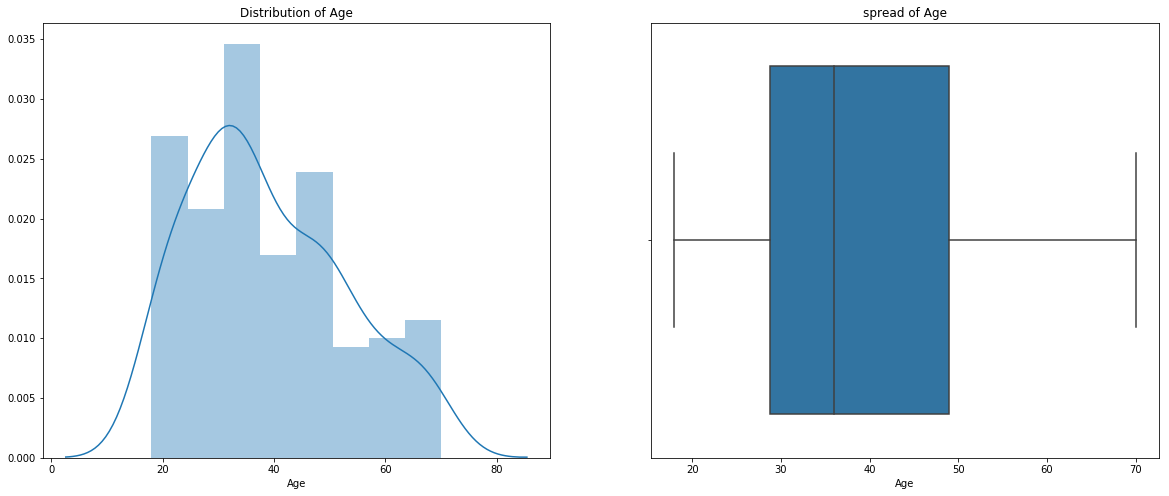

In [11]:
#Age
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.Age)
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.boxplot(df.Age)
plt.title('spread of Age')


Customers Age is ranging between 18 to 70 

there are no outliers in the Age 

Text(0.5, 1.0, 'spread of Income')

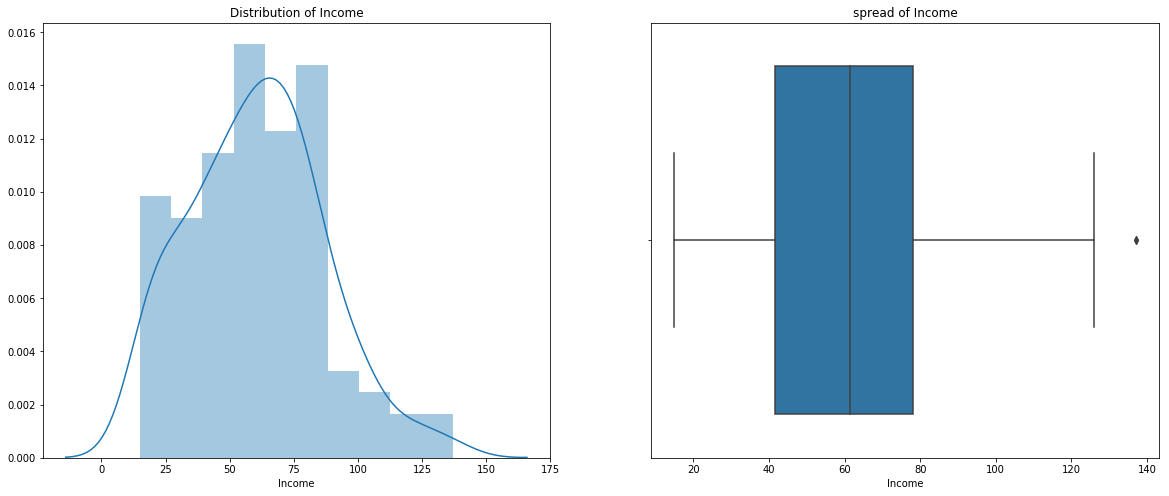

In [12]:
#Income 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.Income)
plt.title('Distribution of Income')

plt.subplot(1,2,2)
sns.boxplot(df.Income)
plt.title('spread of Income')

Customers Income is ranging between 15k($)  to  135k($).

Customers with 50k to 60k income group are more in number.

Text(0.5, 1.0, 'spread of Score')

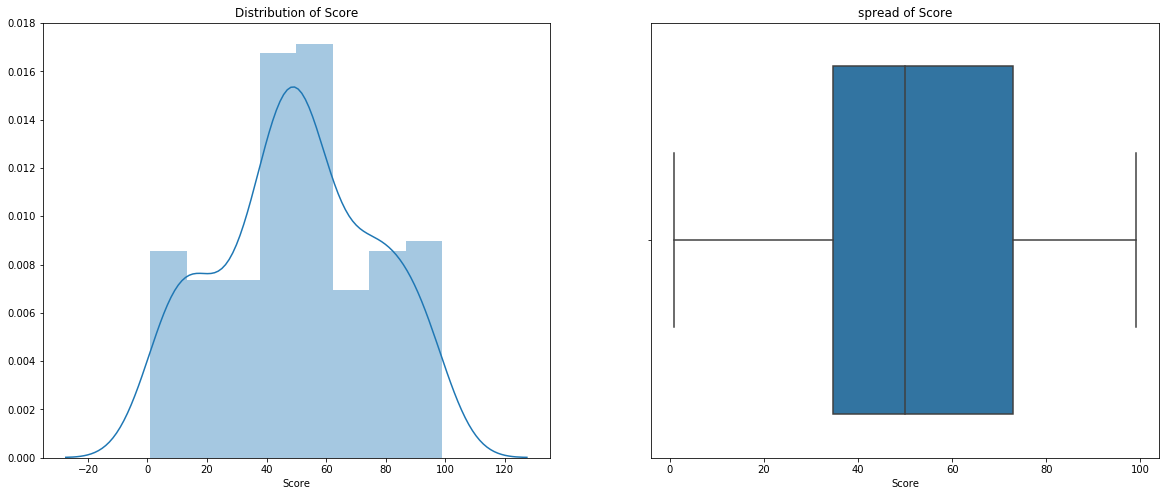

In [13]:
#Score
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.Score)
plt.title('Distribution of Score')

plt.subplot(1,2,2)
sns.boxplot(df.Score)
plt.title('spread of Score')

scores are  ranging from 0 to 100.

Most frequently occured scores are between 40 to 50.

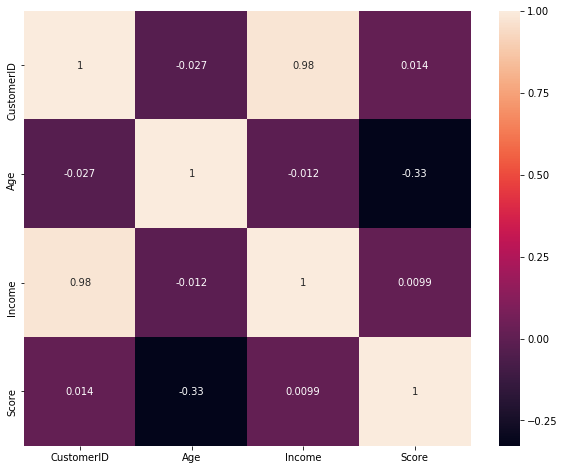

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Both Income and Score are  highly corelated.

Higher income have the higher score.

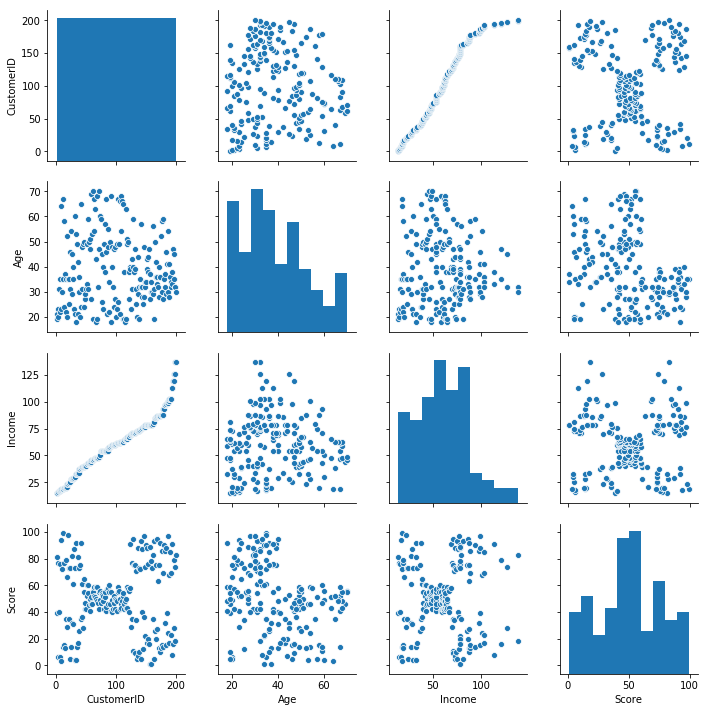

In [15]:
sns.pairplot(data=df)

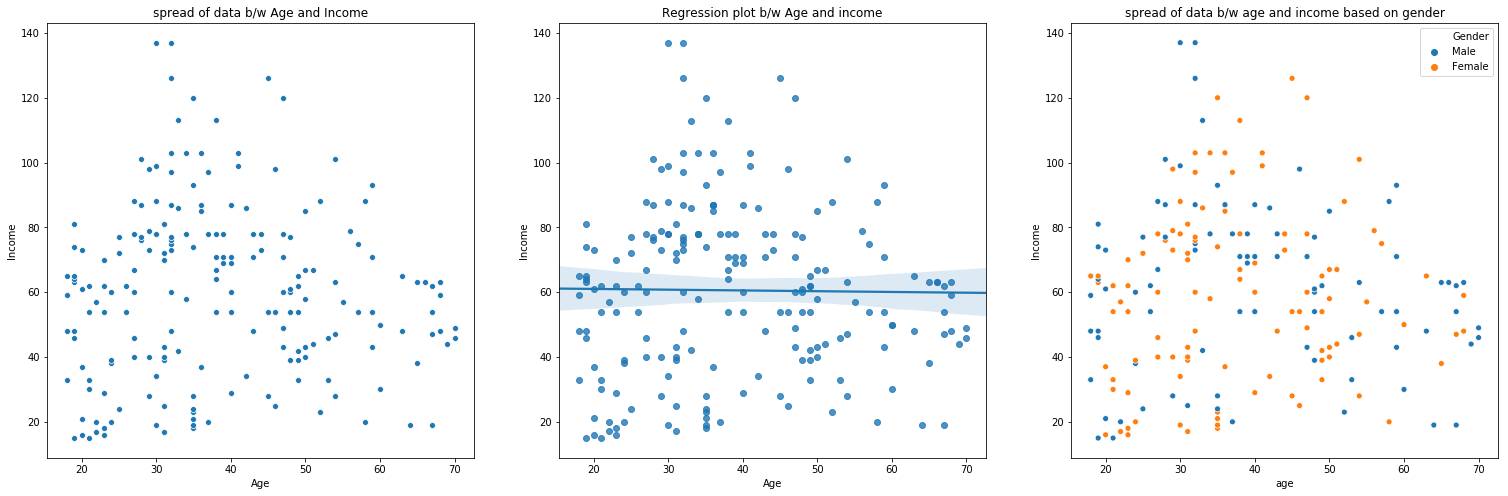

In [16]:
plt.figure(figsize=(26, 8))
plt.subplot(1,3,1)
plt1 = sns.scatterplot(x=df.Age,y=df.Income)
plt.title('spread of data b/w Age and Income')
plt1.set(xlabel = 'Age', ylabel='Income')

plt.subplot(1,3,2)
plt1 = sns.regplot(x=df.Age,y=df.Income)
plt.title('Regression plot b/w Age and income')
plt1.set(xlabel = 'Age', ylabel='Income')

plt.subplot(1,3,3)
plt1 = sns.scatterplot(x=df.Age,y=df.Income,hue=df.Gender)
plt.title('spread of data b/w age and income based on gender')
plt1.set(xlabel = 'age', ylabel='Income')

plt.show()

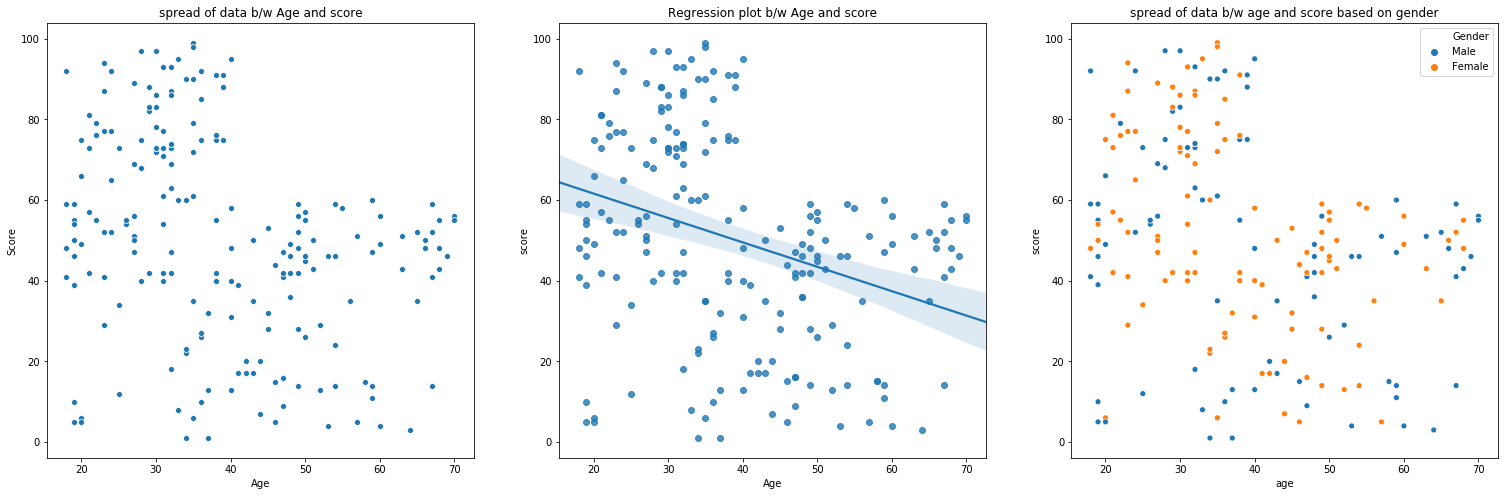

In [17]:
plt.figure(figsize=(26, 8))
plt.subplot(1,3,1)
plt1 = sns.scatterplot(x=df.Age,y=df.Score)
plt.title('spread of data b/w Age and score')
plt1.set(xlabel = 'Age', ylabel='Score')

plt.subplot(1,3,2)
plt1 = sns.regplot(x=df.Age,y=df.Score)
plt.title('Regression plot b/w Age and score')
plt1.set(xlabel = 'Age', ylabel='score')

plt.subplot(1,3,3)
plt1 = sns.scatterplot(x=df.Age,y=df.Score,hue=df.Gender)
plt.title('spread of data b/w age and score based on gender')
plt1.set(xlabel = 'age', ylabel='score')

plt.show()

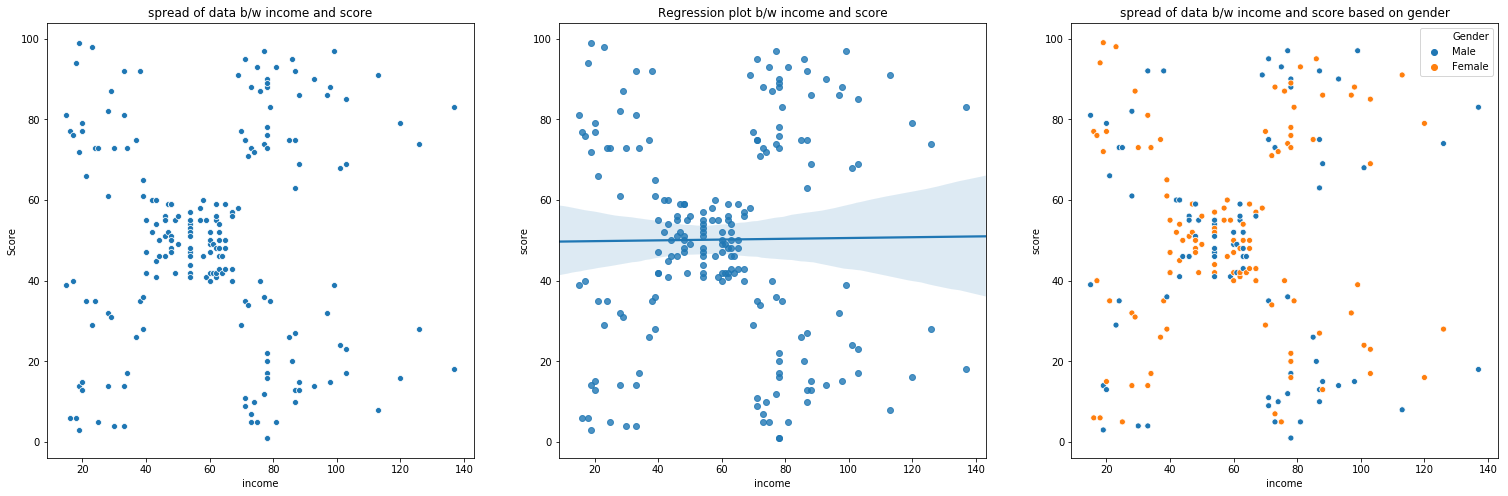

In [18]:
plt.figure(figsize=(26, 8))
plt.subplot(1,3,1)
plt1 = sns.scatterplot(x=df.Income,y=df.Score)
plt.title('spread of data b/w income and score')
plt1.set(xlabel = 'income', ylabel='Score')

plt.subplot(1,3,2)
plt1 = sns.regplot(x=df.Income,y=df.Score)
plt.title('Regression plot b/w income and score')
plt1.set(xlabel = 'income', ylabel='score')

plt.subplot(1,3,3)
plt1 = sns.scatterplot(x=df.Income,y=df.Score,hue=df.Gender)
plt.title('spread of data b/w income and score based on gender')
plt1.set(xlabel = 'income', ylabel='score')

plt.show()

In [19]:
cls=['CustomerID','Gender']
df.drop(cls,axis=1,inplace=True)

In [20]:
df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
from sklearn.preprocessing import StandardScaler
num_cols=['Age','Income','Score']

scaler=StandardScaler()
scaler.fit(df[num_cols])
df[num_cols]=scaler.transform(df[num_cols])


In [22]:
df.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Model building

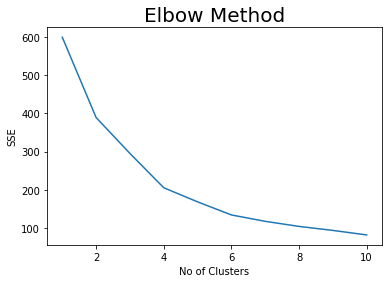

In [23]:
from sklearn.cluster import KMeans

sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=40)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11),sse)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('SSE')
plt.show()

In [24]:
#Model Build
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(df)

In [31]:
y_preds=pd.DataFrame(y_kmeans)

In [32]:
type(y_preds)

pandas.core.frame.DataFrame

In [35]:
y_preds.columns=['clusters']

In [36]:
y_preds

,clusters
0,1
1,1
2,5
3,1
4,5
5,1
6,5
7,1
8,5
9,1
